### 周波数領域におけるフィルタリング
フーリエ変換により、画像は周波数領域に変換される。
この章ではフーリエ変換後の周波数領域において処理を施す周波数フィルタリングについて扱う。

##### フーリエ変換

#### 周波数フィルタリング
フーリエ変換ごの各周波成分の大きさを各成分ごとに変換することにより、元の画質の性質を変化させることができ、
これを周波数フィルタリング(frequency filtering)と呼ぶ。
なお、周波数フィルタリングした結果の画像を得るためにはフーリエ逆変換を行う必要がある

#### 空間フィルタリングと周波数フィルタリング
空間フィルタリングの処理と周波数フィルタリングの処理は等価である。
すなわち数式？

数式

２通りのフィルタリングの計算時間は、空間フィルタの大きさが小さいときは空間フィルタが有利であり、その大きさが大きくなるに従って周波数フィルタリングの方が有利になるといえる。

#### 周波数フィルタリング
ある特定の周波数成分を残すようなタイプのフィルタリングについて
* ローパスフィルタ　　
低周波成分は残して、高周波成分は除去するフィルタ  
u=u0
まで低周波成分はそのまま通し、それ以上の高周波成分は完全にカットする  
→平滑化フィルタリングと同じ
* ハイパスフィルタ  
高周波成分は残して、低周波成分は除去するフィルタ  
* バンドパスフィルタ  
中間的な周波数の範囲を残すフィルタ

#### 広域協調フィルタリング
ハイパスフィルタでは、画像の直流成分を含む低周波成分を除去してしまうため、画像の平均的な明るさが保たれない。
それに対して、画像の低周波成分はそのまま保ちつつ、高周波成分を強調するフィルタを広域強調フィルタ(high-emphasis filter)と呼ぶ。
→アンシャープマスキング？



In [14]:
image = cv2.imread("./images/Lenna.jpg")
print(image[0][0])
print(image.shape)
#FFT
fimage = np.fft.fft2(image)
print (fimage[0][0])
print (fimage.shape)

#inverse fft
ifimage = np.fft.ifft2(fimage)
print(ifimage[0][0])
ifimage = ifimage.real
print(ifimage[0][0])

[120 138 233]
(150, 150, 3)
[62135.    +0.        j -8419.+12758.28624855j -8419.-12758.28624855j]
(150, 150, 3)
[120.+7.38174953e-16j 138.-2.82366359e-15j 233.-5.64758480e-15j]
[120. 138. 233.]


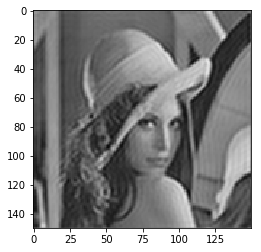

In [6]:
#https://algorithm.joho.info/image-processing/fourier-transform/
#https://lp-tech.net/articles/KMHfN


# -*- coding: utf-8 -*-
import numpy as np
import cv2
import cv2
import numpy as np
from matplotlib import pyplot as plt


def lowpass_filter(src, a = 0.5):
    # 高速フーリエ変換(2次元)
    src = np.fft.fft2(src)
    
    # 画像サイズ
    h, w = src.shape
   
    # 画像の中心座標
    cy, cx =  int(h/2), int(w/2)
    
    # フィルタのサイズ(矩形の高さと幅)
    rh, rw = int(a*cy), int(a*cx)

    # 第1象限と第3象限、第1象限と第4象限を入れ替え
    fsrc =  np.fft.fftshift(src)  

    # 入力画像と同じサイズで値0の配列を生成
    fdst = np.zeros(src.shape, dtype=complex)

    # 中心部分の値だけ代入（中心部分以外は0のまま）
    fdst[cy-rh:cy+rh, cx-rw:cx+rw] = fsrc[cy-rh:cy+rh, cx-rw:cx+rw]
    
    # 第1象限と第3象限、第1象限と第4象限を入れ替え(元に戻す)
    fdst =  np.fft.fftshift(fdst)

    # 高速逆フーリエ変換 
    dst = np.fft.ifft2(fdst)
   
    # 実部の値のみを取り出し、符号なし整数型に変換して返す
    return  np.uint8(dst.real)
    

# 入力画像を読み込み
img = cv2.imread("./images/Lenna.jpg")

# グレースケール変換
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# ローパスフィルタ処理
himg = lowpass_filter(gray, 0.5)

# 処理結果を出力
plt.imshow(himg, cmap='gray',vmin = 0, vmax = 255)
plt.show()

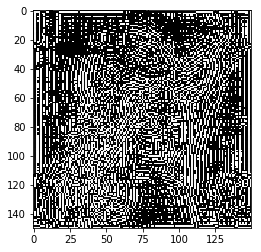

In [18]:
def highpass_filter(src, a = 0.5):
    # 高速フーリエ変換(2次元)
    src = np.fft.fft2(src)
    
    # 画像サイズ
    h, w = src.shape
   
    # 画像の中心座標
    cy, cx =  int(h/2), int(w/2)
    
    # フィルタのサイズ(矩形の高さと幅)
    rh, rw = int(a*cy), int(a*cx)

    # 第1象限と第3象限、第1象限と第4象限を入れ替え
    fsrc =  np.fft.fftshift(src)  

    # 入力画像と同じサイズで値0の配列を生成
    fdst = fsrc.copy()

    # 中心部分だけ0を代入（中心部分以外は元のまま）
    fdst[cy-rh:cy+rh, cx-rw:cx+rw] = 0
    
    # 第1象限と第3象限、第1象限と第4象限を入れ替え(元に戻す)
    fdst =  np.fft.fftshift(fdst)

    # 高速逆フーリエ変換 
    dst = np.fft.ifft2(fdst)
   
    # 実部の値のみを取り出し、符号なし整数型に変換して返す
    return  np.uint8(dst.real)
    


# 入力画像を読み込み
img = cv2.imread("./images/Lenna.jpg")

# グレースケール変換
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# ハイパスフィルタ処理
himg = highpass_filter(gray, 0.7)

# 処理結果を出力
plt.imshow(himg, cmap='gray',vmin = 0, vmax = 255)
plt.show()